# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset

In [2]:
a = "C:/Users/sn408/Downloads/StockDataHDFCBANK.csv"
df = pd.read_csv(a)

# Displaying the first 5 rows of the dataset


In [3]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2023-04-03T09:15:00+0530,1607.55,1609.55,1606.00,1606.65,169821
1,1,2023-04-03T09:20:00+0530,1606.55,1607.95,1603.40,1607.25,203608
2,2,2023-04-03T09:25:00+0530,1607.45,1607.65,1604.10,1607.00,164006
3,3,2023-04-03T09:30:00+0530,1607.00,1610.15,1606.70,1609.10,226137
4,4,2023-04-03T09:35:00+0530,1609.40,1610.40,1607.65,1608.25,138182


# Displaying the last 5 rows of the dataset

In [4]:
df.tail()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
1346,1346,2023-05-02T15:10:00+0530,1690.35,1692.70,1685.75,1685.75,547784
1347,1347,2023-05-02T15:15:00+0530,1686.05,1686.65,1682.55,1684.05,540934
1348,1348,2023-05-02T15:20:00+0530,1684.25,1687.50,1683.15,1683.80,324980
1349,1349,2023-05-02T15:25:00+0530,1683.80,1684.95,1682.05,1682.90,219808
1350,1350,2023-05-02T15:30:00+0530,1682.90,1682.90,1682.90,1682.90,0


# Checking for missing values

In [5]:
df.isnull().sum()

Unnamed: 0    0
Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
dtype: int64

# Getting a summary of the dataset¶

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1351 entries, 0 to 1350
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1351 non-null   int64  
 1   Date        1351 non-null   object 
 2   Open        1351 non-null   float64
 3   High        1351 non-null   float64
 4   Low         1351 non-null   float64
 5   Close       1351 non-null   float64
 6   Volume      1351 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 74.0+ KB


# Data Preprocessing

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Displaying the updated dataset structure

In [8]:
print(df.head())

                           Unnamed: 0     Open     High      Low    Close  \
Date                                                                        
2023-04-03 09:15:00+05:30           0  1607.55  1609.55  1606.00  1606.65   
2023-04-03 09:20:00+05:30           1  1606.55  1607.95  1603.40  1607.25   
2023-04-03 09:25:00+05:30           2  1607.45  1607.65  1604.10  1607.00   
2023-04-03 09:30:00+05:30           3  1607.00  1610.15  1606.70  1609.10   
2023-04-03 09:35:00+05:30           4  1609.40  1610.40  1607.65  1608.25   

                           Volume  
Date                               
2023-04-03 09:15:00+05:30  169821  
2023-04-03 09:20:00+05:30  203608  
2023-04-03 09:25:00+05:30  164006  
2023-04-03 09:30:00+05:30  226137  
2023-04-03 09:35:00+05:30  138182  


# Marking significant support levels

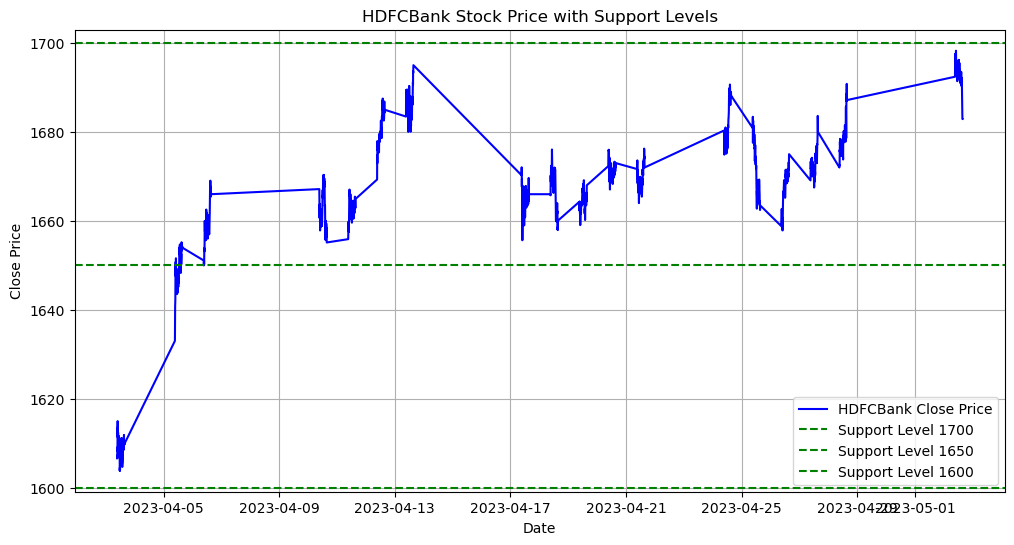

In [9]:
# Plotting the HDFCBank stock prices
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='HDFCBank Close Price', color='blue')

# Marking significant support levels (you can customize these levels based on your analysis)
support_levels = [1700, 1650, 1600]
for level in support_levels:
    plt.axhline(y=level, color='green', linestyle='--', label=f'Support Level {level}')

# Adding Labels and Title
plt.title('HDFCBank Stock Price with Support Levels')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Trend line 

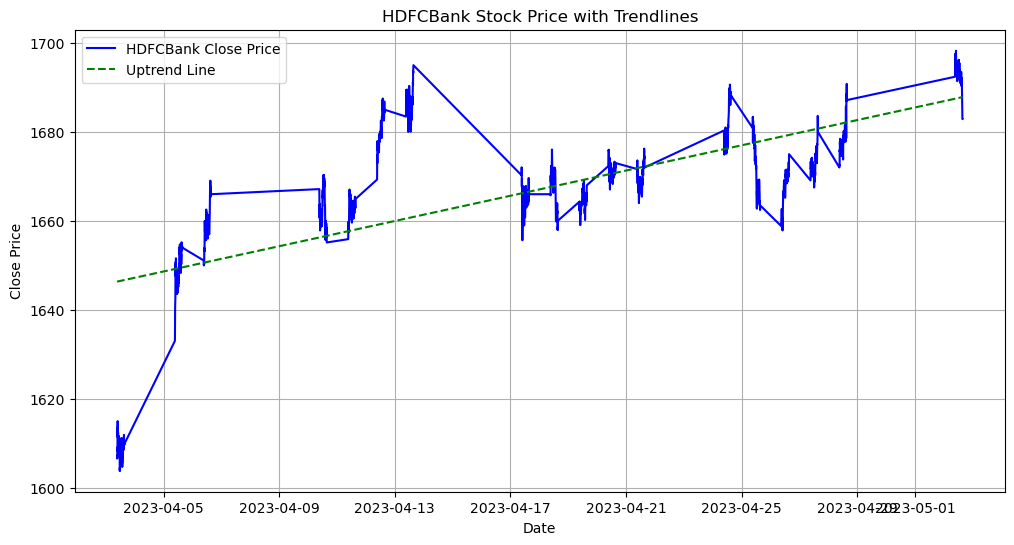

In [17]:
# Convert DatetimeIndex to numerical values (e.g., timestamps)
df['Timestamp'] = df.index.astype(np.int64) // 10**9  # Convert to seconds for numerical stability

# Use the converted timestamp for fitting the trendline
uptrend_line = np.polyfit(df['Timestamp'], df['Close'], 1)

# Plot the trendline
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='HDFCBank Close Price', color='blue')
plt.plot(df.index, np.polyval(uptrend_line, df['Timestamp']), linestyle='--', color='green', label='Uptrend Line')

# Adding Labels and Title
plt.title('HDFCBank Stock Price with Trendlines')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


#  Line chart

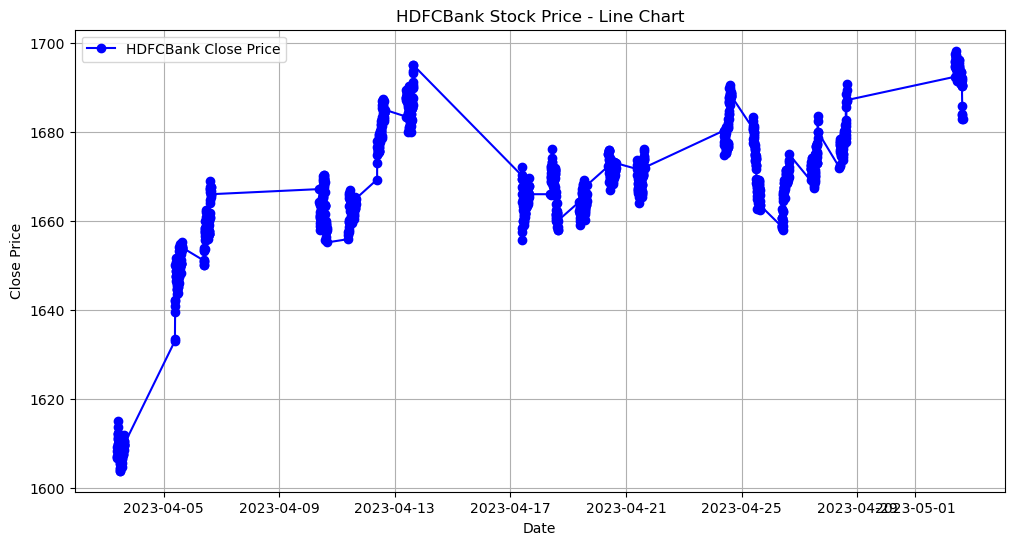

In [18]:
# Plotting the HDFCBank stock prices using a line chart
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='HDFCBank Close Price', color='blue', marker='o')

# Adding labels and title
plt.title('HDFCBank Stock Price - Line Chart')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


#  Bar chart

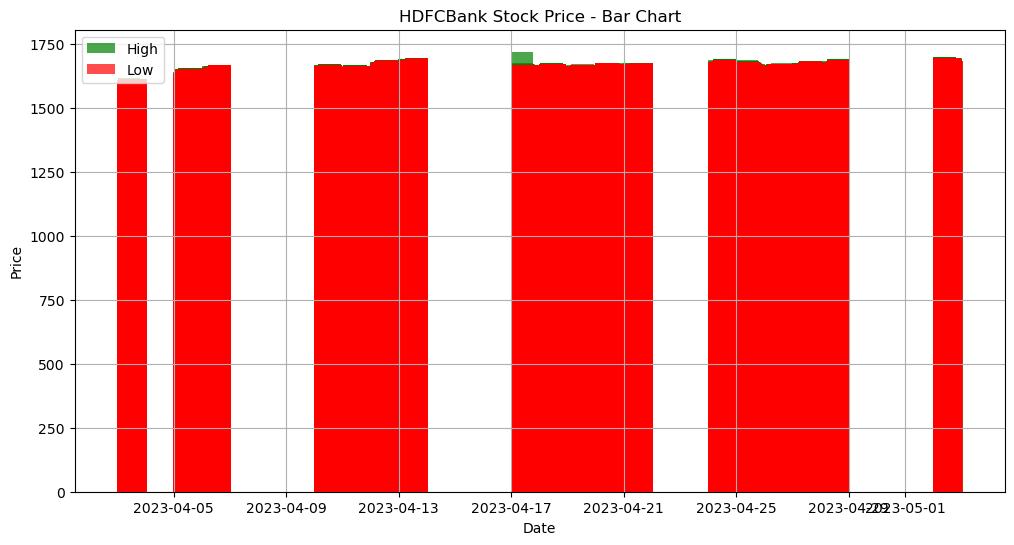

In [19]:
# Plotting the HDFCBank stock prices using a bar chart
plt.figure(figsize=(12, 6))
plt.bar(df.index, df['High'], label='High', color='green', alpha=0.7)
plt.bar(df.index, df['Low'], label='Low', color='red', alpha=0.7)

# Adding labels and title
plt.title('HDFCBank Stock Price - Bar Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


# Candlestick chart

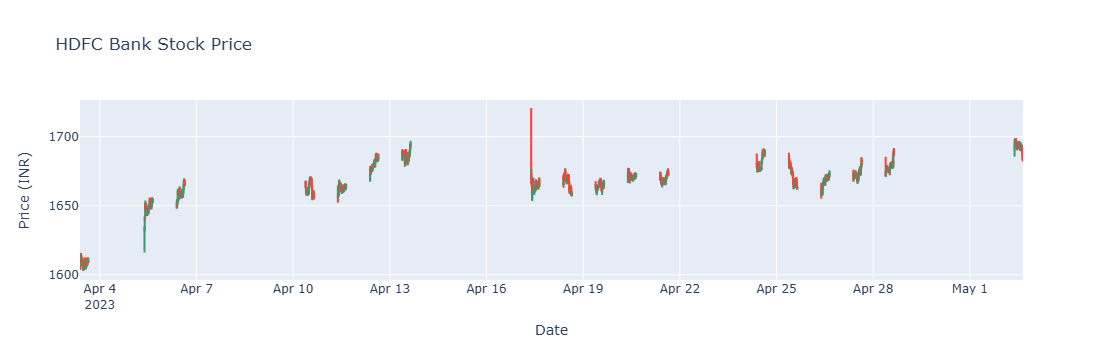

In [22]:
import plotly.graph_objects as go

# Assuming df is your DataFrame containing the HDFC Bank stock data
# The DataFrame should have columns: 'Open', 'High', 'Low', 'Close', and the index as 'Date'

fig = go.Figure(data=[go.Candlestick(
    x=df.index,              # Use the index for the x-axis (dates)
    open=df['Open'],         # Open prices
    high=df['High'],         # High prices
    low=df['Low'],           # Low prices
    close=df['Close']        # Close prices
)])

# Updating the layout to add title and axis labels
fig.update_layout(
    title='HDFC Bank Stock Price',   # Chart title
    xaxis_title='Date',              # x-axis label
    yaxis_title='Price (INR)',       # y-axis label with currency (INR)
    xaxis_rangeslider_visible=False  # Disable the range slider
)

# Save the candlestick chart as an HTML file
fig.write_html('hdfc_bank_stock_price_candlestick.html')

# Display the candlestick chart
fig.show()


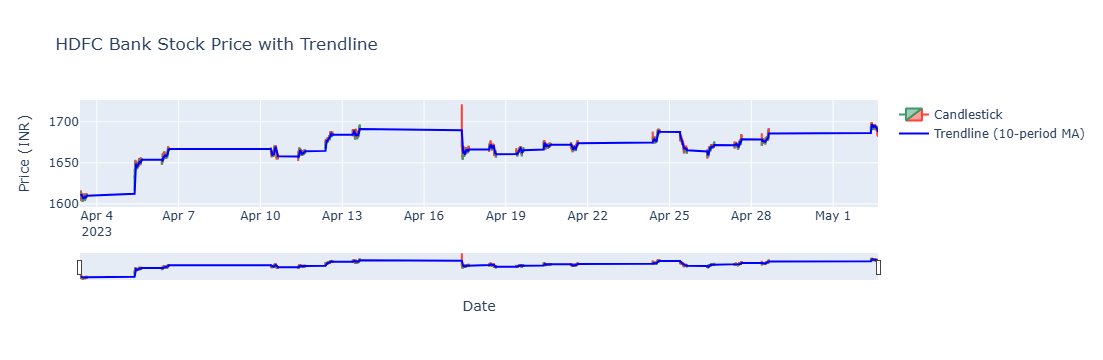

In [27]:
import plotly.graph_objects as go
import pandas as pd

# Assuming df is your DataFrame containing the HDFC Bank stock data
# The DataFrame should have columns: 'Open', 'High', 'Low', 'Close', and the index as 'Date'

# Example: Generating a trendline (moving average)
df['Trendline'] = df['Close'].rolling(window=10).mean()  # 10-period moving average for trendline

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=df.index,              # Dates
    open=df['Open'],         # Open prices
    high=df['High'],         # High prices
    low=df['Low'],           # Low prices
    close=df['Close'],       # Close prices
    name='Candlestick'
)])

# Add the trendline to the chart
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['Trendline'],
    mode='lines',
    name='Trendline (10-period MA)',
    line=dict(color='blue', width=2)
))

# Update the layout for better visualization
fig.update_layout(
    title='HDFC Bank Stock Price with Trendline',
    xaxis_title='Date',
    yaxis_title='Price (INR)',
    xaxis_rangeslider_visible=True,  # Enable the range slider for better navigation
    template='plotly'                # Optional: Adjust the visual style
)

# Save the chart as an interactive HTML file
fig.write_html('hdfc_bank_stock_price_with_trendline.html')

# Show the chart
fig.show()


# This is about DEMO. - Moving back to the presenpresentation 